Markdown basics (http://daringfireball.net/projects/markdown/basics)
# NY Taxi Rides

### Data Provided by the New York City Taxi and Limousine Commission.
Full dataset is 170 million taxi trips, 100GB of free space. Our subset is 0.5% of all trips, about 850,000 rides. Download the dataset from Cyrille Rossant on GitHub: https://github.com/ipython-books/minibook-2nd-data (https://github.com/ipython-books/minibook-2nd-data) NYC Taxi & Limousine Commission website (http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml) NYC Gov data description website (http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)


In [231]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline


In [232]:
pwd

'/Users/batman/Desktop'

In [233]:
#File Path for NYC Data
#data_filename = '../data/nyc_data.csv' 
data_filename = '/Users/batman/Desktop/data/nyc_data.csv'

In [234]:
data = pd.read_csv(data_filename, 
                   parse_dates=['pickup_datetime', 'dropoff_datetime'] )
#pd.read_csv?

head() method of DataFrames displays the first three lines of the table

In [235]:
data.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:06:00,6,0,0.00,-73.991432,40.755081,-73.991417,40.755085
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:12:00,2,360,1.31,-73.966225,40.773716,-73.955399,40.782597


In [236]:
#File Path for NYC Fare Data
tx_fare = pd.read_csv('/Users/batman/Desktop/data/nyc_fare.csv')


In [237]:
tx_fare.head() #Reviewing Data

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,2013-01-01 00:00:00,CSH,5.0,0.5,0.5,0.0,0.0,6.0
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,2013-01-01 00:05:00,CRD,13.5,0.5,0.5,2.8,0.0,17.3
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,2013-01-01 00:05:52,CSH,7.5,0.5,0.5,0.0,0.0,8.5
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,2013-01-01 00:06:00,CSH,2.5,0.5,0.5,0.0,0.0,3.5
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,2013-01-01 00:06:00,CSH,6.5,0.5,0.5,0.0,0.0,7.5


In [238]:
data.dtypes #Reviewing function types to ensure consistency 

medallion                     object
hack_license                  object
vendor_id                     object
rate_code                      int64
store_and_fwd_flag            object
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
trip_time_in_secs              int64
trip_distance                float64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
dtype: object

In [239]:
tx_fare.dtypes

medallion           object
hack_license        object
vendor_id           object
pickup_datetime     object
payment_type        object
fare_amount        float64
surcharge          float64
mta_tax            float64
tip_amount         float64
tolls_amount       float64
total_amount       float64
dtype: object

In [240]:
#changing pickup_datetime for consistency purposes to datetime64

tx_fare['pickup_datetime'] =  pd.to_datetime(tx_fare['pickup_datetime'], format='%Y-%m-%d')

In [241]:
#Merging to Dataframes
df = pd.merge(data, tx_fare,  how='inner', left_on=['medallion','hack_license','vendor_id','pickup_datetime'], right_on = ['medallion','hack_license','vendor_id','pickup_datetime'])

In [242]:
df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,...,40.781887,-73.963181,40.777832,CSH,5.0,0.5,0.5,0.0,0.0,6.0
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,...,40.745735,-73.964943,40.755722,CRD,13.5,0.5,0.5,2.8,0.0,17.3
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,...,40.799770,-73.954567,40.787392,CSH,7.5,0.5,0.5,0.0,0.0,8.5
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:06:00,6,0,0.00,...,40.755081,-73.991417,40.755085,CSH,2.5,0.5,0.5,0.0,0.0,3.5
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:12:00,2,360,1.31,...,40.773716,-73.955399,40.782597,CSH,6.5,0.5,0.5,0.0,0.0,7.5


In [243]:
print(df.shape)

(846945, 21)


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846945 entries, 0 to 846944
Data columns (total 21 columns):
medallion             846945 non-null object
hack_license          846945 non-null object
vendor_id             846945 non-null object
rate_code             846945 non-null int64
store_and_fwd_flag    424577 non-null object
pickup_datetime       846945 non-null datetime64[ns]
dropoff_datetime      846945 non-null datetime64[ns]
passenger_count       846945 non-null int64
trip_time_in_secs     846945 non-null int64
trip_distance         846945 non-null float64
pickup_longitude      846945 non-null float64
pickup_latitude       846945 non-null float64
dropoff_longitude     846945 non-null float64
dropoff_latitude      846945 non-null float64
payment_type          846945 non-null object
fare_amount           846945 non-null float64
surcharge             846945 non-null float64
mta_tax               846945 non-null float64
tip_amount            846945 non-null float64
tolls_amount

In [245]:
#Running Numeric Statistics 
df.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,846945.000000,846945.000000,8.469450e+05,8.469450e+05,846945.000000,846945.000000,846945.000000,846945.000000,846945.000000,846945.000000,846945.000000,846945.00000,846945.000000,846945.000000
mean,1.026123,1.710272,8.125239e+02,9.958211e+00,-73.975155,40.750490,-73.974197,40.750967,12.190578,0.320303,0.499305,1.34466,0.232142,14.587073
std,0.223480,1.375266,1.609831e+04,6.525205e+03,0.035142,0.027224,0.033453,0.030766,9.514150,0.772642,0.057844,2.09149,1.109164,11.380950
min,0.000000,0.000000,-1.000000e+01,0.000000e+00,-74.098305,40.009911,-74.099998,40.009911,-648.420000,-1.000000,-0.500000,0.00000,0.000000,-52.500000
25%,1.000000,1.000000,3.610000e+02,1.050000e+00,-73.992371,40.736031,-73.991570,40.735207,6.500000,0.000000,0.500000,0.00000,0.000000,8.000000
50%,1.000000,1.000000,6.000000e+02,1.800000e+00,-73.982094,40.752975,-73.980614,40.753597,9.500000,0.000000,0.500000,1.00000,0.000000,11.000000
75%,1.000000,2.000000,9.600000e+02,3.200000e+00,-73.968048,40.767460,-73.965157,40.768227,14.000000,0.500000,0.500000,2.00000,0.000000,16.500000
max,6.000000,6.000000,4.294796e+06,6.005123e+06,-73.028473,40.996132,-73.027061,40.998592,620.010000,628.840000,41.490000,200.00000,100.660000,620.010000


In [246]:
#Removing duplicate data that could skew results/analysis 
df = df.drop_duplicates()

In [247]:
df1 = df.copy()  #Making copy to manipulate and analyze data 

In [248]:
#Observing the data reveals negative amounts (for example, min from above).  This must be an input error as 
#fare/trip/charge amounts cannot be negative.  Will remove these values.  

df1 = df1[df1['total_amount']>=0]
df1 = df1[df1['trip_time_in_secs']>=0] 
df1 = df1[df1['fare_amount']>=0] 
df1 = df1[df1['surcharge']>=0]
df1 = df1[df1['mta_tax']>=0] 

In [249]:
print('Previous size: %d' % len(df),'; Altered size: %d' % len(df1))  #comparing size of pre and post df's 

Previous size: 846945 ; Altered size: 846927


In [250]:
#Searching for columns that may have substantial missing values 
missing_values = df1.isnull().sum() * 100 / len(df1)

In [251]:
 mvDF = pd.DataFrame({'column': df1.columns,
                                 'Missing Percentage': missing_values})  #identifying missing values as a percentage

In [252]:
mvDF.reset_index(drop=True) #reveales that (4) 'store and fwd flag' has approx 50% of values missing.   We should 
#therefore drop this column

,column,Missing Percentage
0,medallion,0.000000
1,hack_license,0.000000
2,vendor_id,0.000000
3,rate_code,0.000000
4,store_and_fwd_flag,49.868643
5,pickup_datetime,0.000000
6,dropoff_datetime,0.000000
7,passenger_count,0.000000
8,trip_time_in_secs,0.000000
9,trip_distance,0.000000


In [253]:
df1 = df1.drop('store_and_fwd_flag',axis=1)

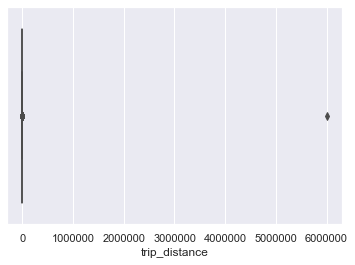

In [254]:
#Now that we have calculated numerical amounts, removed missing values/data, we shall identify data which 
#are inconsistent with the remaining data set.

#We are going to use Plots to graphically review data ~ similar to histograms and scatterplots. 
#The plot reveals an outlier trip distance of 6 million miles (which has to be an error)

import seaborn as sns
sns.boxplot(x=df1['trip_distance']) 

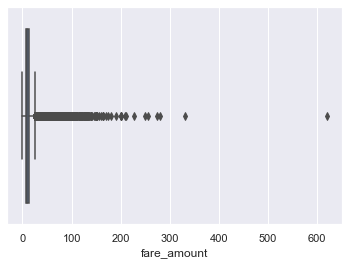

In [255]:
sns.boxplot(x=df1['fare_amount']) #the plot reveals a few rides greater than $300 USD with a max approximately 
#$600 USD.  

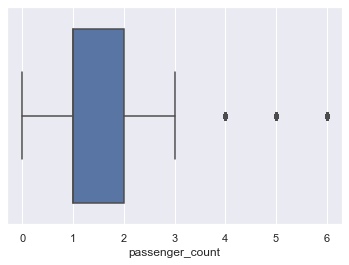

In [256]:
sns.boxplot(x=df1['passenger_count'])

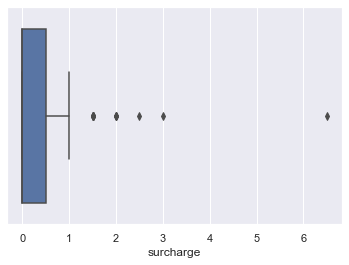

In [257]:
sns.boxplot(x=df1['surcharge'])

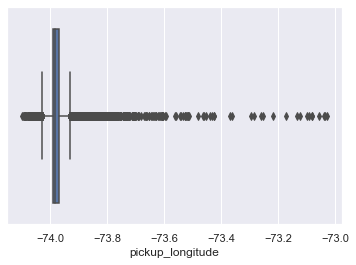

In [258]:
sns.boxplot(x=df1['pickup_longitude'])

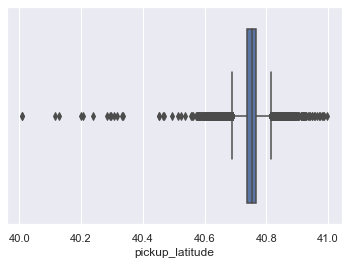

In [259]:
sns.boxplot(x=df1['pickup_latitude'])

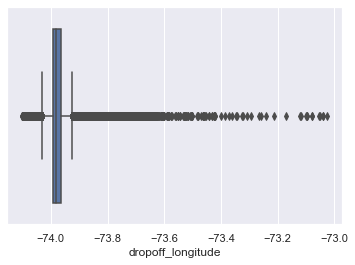

In [260]:
sns.boxplot(x=df1['dropoff_longitude'])

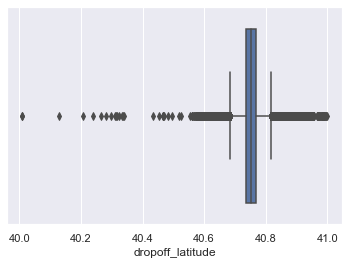

In [261]:
sns.boxplot(x=df1['dropoff_latitude'])

In [262]:
# REMOVE OUTLIERS--for trip distance of approx 6,000,000 miles as this is obvisouly an error and 
#could skew the dataset 

df2 = df1.copy()
df2 = df2[(df2['trip_distance']) < 6000000].reset_index(drop=True)

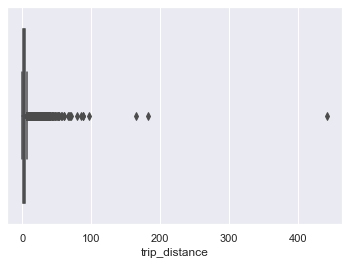

In [263]:
sns.boxplot(x = df2['trip_distance']) #reveals data which is more consistent with the remaining dataset and shows 3
#trips greater than 100 miles.   Technically, there would be 4 if we included the 6M mile trip.  

In [264]:
df2 = df2[(df2['total_amount']) < 300].reset_index(drop=True) #limit view to rides less than $300 USD to obtain a 
#better view of the mean fare amount--allows for better estimation. 

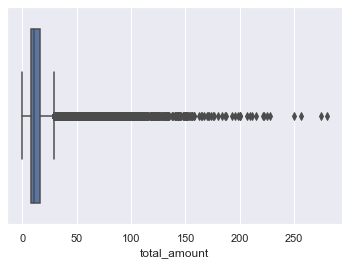

In [265]:
sns.boxplot(x = df2['total_amount']) #checking distribution to ensure accuracy 

In [266]:
#now that OUTLIERS are REMOVED we can run distribution graphs to check for averages 
import seaborn as sns
from scipy import stats

In [267]:
sns.set(color_codes=True)

In [268]:
grouping = ['passenger_count','total_amount']

<Figure size 432x288 with 0 Axes>

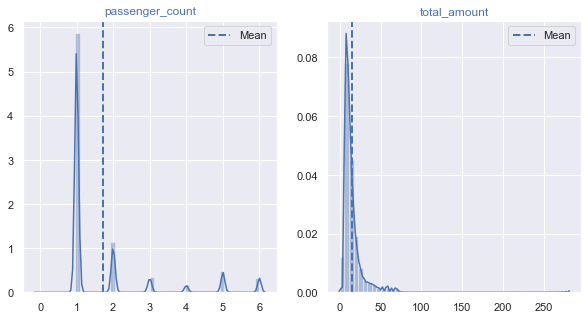

In [269]:
a=0
plt.figure()
fig, ax = plt.subplots(3,2, figsize = (10, 5))
for columns in grouping:
    a += 1
    plt.subplot(1, 2, a)
    sns.distplot(df2[columns])
    plt.axvline(df2[columns].mean(),linewidth  = 2 ,
                linestyle = "dashed",color = "b" ,
                label = "Mean")
    plt.legend(loc = "best")
    plt.title(columns,color = "b")
    plt.xlabel("")  

In [270]:
#The distribution graphs clearly show that the Mean passengers is approximately ONE.   And the MEAN fare is a slightly 
#less than $25~approximately $5 to $15 USD.   

In [271]:
#Checking frequencies of Categorical Variables

cat = df2.columns[df2.dtypes=="object"]
df2[cat].describe()

,medallion,hack_license,vendor_id,payment_type
count,846924,846924,846924,846924
unique,13446,38391,2,5
top,20BA941F62CC07F1FA3EF3E122B1E9B2,03173DD93C1171DA1788E6E7D733C5A9,CMT,CRD
freq,125,97,424675,456017


Get the actual coordinates: four DataFrame columns
These four variables are all Series objects:

In [272]:
#We can check the Frequency of vendor ID to determine which cab company is more readily available throughout the city
NYcabs = pd.crosstab(index=df2["vendor_id"],columns="count")
NYcabs.columns.name = None
NYcabs = NYcabs.reset_index()
NYcabs

,vendor_id,count
0,CMT,424675
1,VTS,422249


In [273]:
#From the results we see that the TWO companies CMT and VTS share a proportionate amount of the NYC taxi 
#business--therefore you have an almost equal probability of getting either one.  However, to be technical, since CMT
#has a bit higher frequency, then you could argue that it's easier to get a cab with CMT.  

#Scatter Plots and Histograms 

In [274]:
p_lng = df2.pickup_longitude
p_lat = df2.pickup_latitude
d_lng = df2.dropoff_longitude
d_lat = df2.dropoff_latitude

In [275]:
# a Series is an indexed list of values.  Please compare these values to the graphs above--which detail the same values
p_lng.head()

0   -73.955925
1   -74.005501
2   -73.969955
3   -73.991432
4   -73.966225
Name: pickup_longitude, dtype: float64

In [276]:
# Get the coordinates of points in pixels from geographical coordinates.
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

In [277]:
# Get pickup coordinates from pickup latitude and longitude
px, py = lat_lng_to_pixels(p_lat, p_lng)
py.head()

0   -37.572749
1   -37.586007
2   -37.566187
3   -37.582580
4   -37.575746
Name: pickup_latitude, dtype: float64

Display a scatter plot of pickup locations
Matplotlib scatter function makes a scatter plot of x vs y, where x and y are sequence like objects of the same
length.
Documentation: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
(http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)

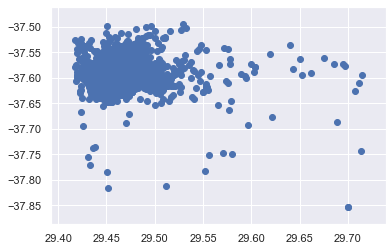

In [278]:
plt.scatter(px, py)

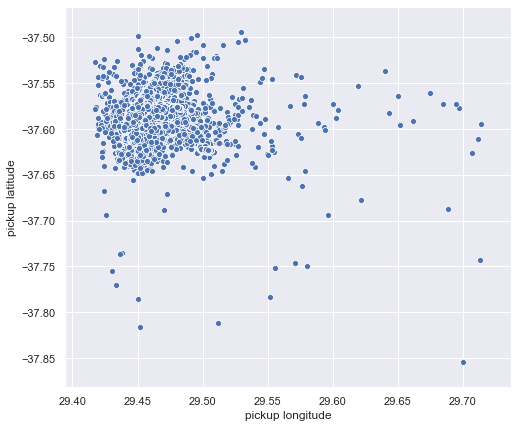

In [279]:
plt.figure(figsize=(8,7))
sns.scatterplot(px, py)
plt.ylabel("pickup latitude", size=12)
plt.xlabel("pickup longitude", size=12)
plt.show()

### Customize our plot:
- Make markers smaller
- Make fewer points by making some points transparent
- Zoom in around Manhattan
- Make figure bigger
- Don't display the axes

plt or matplotlib.pyplot is a collection of command style functions. Each pyplot function makes some change to
a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates
the plot with labels, etc. ...

(29.4, 29.55, -37.63, -37.54)

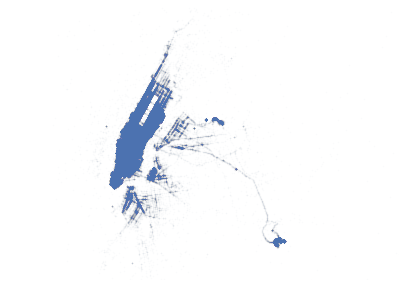

In [280]:
# Specify visual size
plt.figure(figsize=(7, 5))
plt.scatter(px, py, s=.1, alpha=0.03)
plt.axis('equal')
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
# removing the axis 
plt.axis('off')

In [281]:
#This is the same code above which shows an alternate method of deciding which vendor is it easier to find a cab
NYcabs = pd.crosstab(index=df2["vendor_id"],columns="count")
NYcabs.columns.name = None
NYcabs = NYcabs.reset_index()
NYcabs

,vendor_id,count
0,CMT,424675
1,VTS,422249


In [282]:
#Vendor/cab frequencies via Scattor Plots

CMT = df2[(df2['vendor_id']) == 'CMT'].reset_index(drop=True)
VTS = df2[(df2['vendor_id']) == 'VTS'].reset_index(drop=True)
# Get the pickup locations of CMT
CMT_lng = CMT.pickup_longitude
CMT_lat = CMT.pickup_latitude
# Get the pickup locations of VTS
VTS_lng = VTS.pickup_longitude
VTS_lat = VTS.pickup_latitude


(29.4, 29.55, -37.63, -37.54)

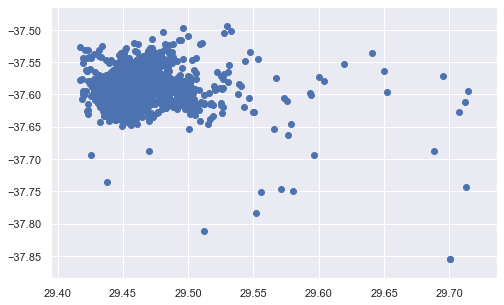

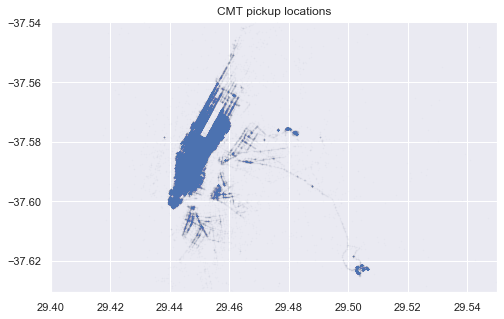

In [283]:
# Scatterplot of CMT Pickup locations 
plt.figure(figsize=(8, 5))
px1, py1 = lat_lng_to_pixels(CMT_lat, CMT_lng)
plt.scatter(px1, py1)
plt.figure(figsize=(8, 5))
plt.scatter(px1, py1, s=.1, alpha=0.03)
plt.axis('equal')
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
plt.title('CMT pickup locations')
plt.axis('on')

(29.4, 29.55, -37.63, -37.54)

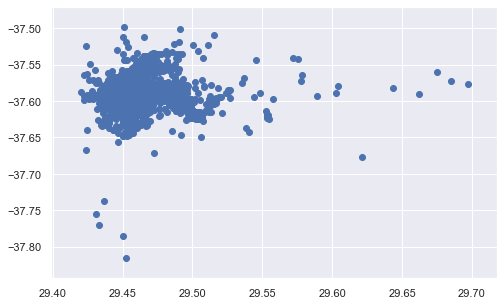

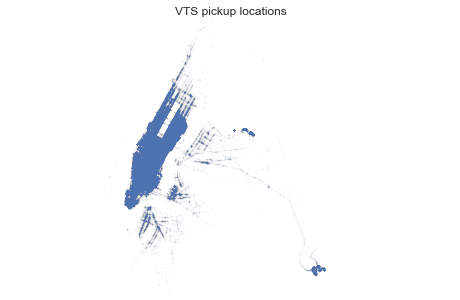

In [284]:
# Scatterplot of VTS pickup locations
plt.figure(figsize=(8, 5))
px2, py2 = lat_lng_to_pixels(VTS_lat, VTS_lng)
plt.scatter(px2, py2)
plt.figure(figsize=(8, 5))
plt.scatter(px2, py2, s=.1, alpha=0.03)
plt.axis('equal')
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
plt.title('VTS pickup locations')
plt.axis('off')

In [285]:
#Based on the Scatterplots--which are very similar--the argument can be made that it is easier to find a cab with
#CMT as it appears to be "more" scatered about NYC.   

## Display a histogram of the trip distances.
pandas Series hist() draws histogram of the input Series using Matplotlib: documentation
(http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html).

Manhattan Island is 13.4 miles long and 2.3 miles wide.

What is a histogram? (https://statistics.laerd.com/statistical-guides/understanding-histograms.php)
numpy linspace() returns evenly spaced numbers over a specified interval.
Parameters: start - interval start; stop - interval stop; num - number of numbers. numpy linspace()
documentation (https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)


In [286]:
bin_array = np.linspace(start=0., stop=10., num=100)
bin_array

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

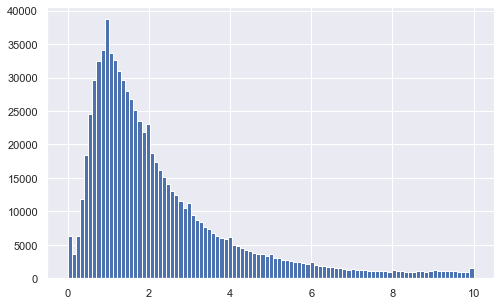

In [287]:
plt.figure(figsize=(8, 5))
df2.trip_distance.hist(bins=bin_array)

In [288]:
#From the histogram the most common trip distance is approximately 1.0 mile

In [289]:
x= df2['trip_distance'].value_counts()  #the Value_Counts function provides quantitative evidence that 1.0 miles is 
#the most common trip distance
print(x)

1.00     21815
0.90     18915
0.80     18449
1.10     18263
1.20     17823
         ...  
33.20        1
14.46        1
48.30        1
28.55        1
44.90        1
Name: trip_distance, Length: 2647, dtype: int64


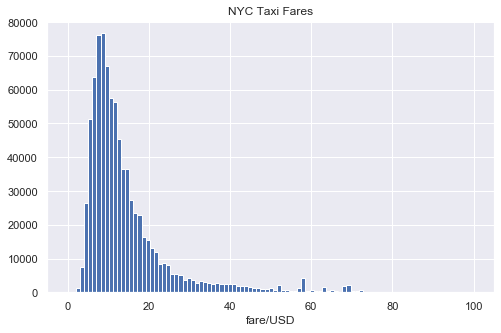

In [290]:
#Histogram for Trip Fares
plt.figure(figsize=(8, 5))
bin_array = np.linspace(start=0, stop=100, num=100)
df2.total_amount.hist(bins=bin_array)
plt.xlabel('fare/USD')
plt.title('NYC Taxi Fares');

In [291]:
#Based on the Histogram it appears that the average fare is approximately $10 USD with a range from about $2 
#approximately $75 USD.     

In [292]:
y= df2['total_amount'].value_counts() #looking at the quantitative counts which supports our observations.
print(y)

9.00      30209
6.50      28883
8.00      28752
7.00      27764
7.50      27494
          ...  
23.09         1
77.78         1
16.73         1
140.45        1
76.85         1
Name: total_amount, Length: 3850, dtype: int64


## Filtering with boolean indexing
### Select long rides

In [293]:
df1.loc[df1.trip_distance > 100] #will use this to determine HOW many rides longer than 100 miles --to see if it 
#coincides with our graphs above.  

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
504497,7237EC7ABD6114EDDC87A3AA846F8418,D52502537E2DF62C9BFFECF5A387E7E9,CMT,1,2013-08-02 11:22:31,2013-08-02 11:33:03,1,631,6005123.0,-73.997467,40.736397,-73.991882,40.764629,CRD,10.0,0.0,0.50,2.62,0.00,13.12
507107,50DA72F510E2F84A42712E13744FAC7B,EA9D03A766C1D32A6668FFF0C1EB4E4B,CMT,1,2013-08-04 18:42:17,2013-08-04 20:37:19,3,4290965,181.8,-73.978020,40.765167,-73.815041,40.730076,CSH,2.5,0.5,0.50,0.00,5.33,8.83
548988,A978A0AAE9B2CFEE310FACD97A09C319,CE56A27F53ABF411094B6CD708BFBA96,CMT,1,2013-08-24 17:03:27,2013-08-24 17:03:29,1,1,442.0,-73.993896,40.702644,-73.993874,40.702637,NOC,22.5,0.0,41.49,0.00,0.00,63.99
558665,5A5C516A820FE476E9D3E14101B669AC,C24585AA866FC76A4E09A05F55DC7E54,CMT,2,2013-08-29 10:01:40,2013-08-29 11:52:20,1,6640,164.4,-73.791534,40.661026,-73.983734,40.765778,NOC,0.0,0.0,0.00,0.00,0.00,0.00


In [294]:
df1.loc[df1.trip_distance > 100].count()

medallion            4
hack_license         4
vendor_id            4
rate_code            4
pickup_datetime      4
dropoff_datetime     4
passenger_count      4
trip_time_in_secs    4
trip_distance        4
pickup_longitude     4
pickup_latitude      4
dropoff_longitude    4
dropoff_latitude     4
payment_type         4
fare_amount          4
surcharge            4
mta_tax              4
tip_amount           4
tolls_amount         4
total_amount         4
dtype: int64

In [295]:
#The Boolean Indexing reveals that there are 4 trips avbove 100 miles; including the 6 million mile trip 
#as we saw above.  However, there cannot be a 6M mile taxi ride.   Therefore, please see below for the analysis on 
#dataframe 2 which has had the 6M mile trip removed.   


In [296]:
df2.loc[df2.trip_distance > 100] #There are 3 taxi rides greater than 100 miles. 

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
507105,50DA72F510E2F84A42712E13744FAC7B,EA9D03A766C1D32A6668FFF0C1EB4E4B,CMT,1,2013-08-04 18:42:17,2013-08-04 20:37:19,3,4290965,181.8,-73.978020,40.765167,-73.815041,40.730076,CSH,2.5,0.5,0.50,0.0,5.33,8.83
548971,A978A0AAE9B2CFEE310FACD97A09C319,CE56A27F53ABF411094B6CD708BFBA96,CMT,1,2013-08-24 17:03:27,2013-08-24 17:03:29,1,1,442.0,-73.993896,40.702644,-73.993874,40.702637,NOC,22.5,0.0,41.49,0.0,0.00,63.99
558646,5A5C516A820FE476E9D3E14101B669AC,C24585AA866FC76A4E09A05F55DC7E54,CMT,2,2013-08-29 10:01:40,2013-08-29 11:52:20,1,6640,164.4,-73.791534,40.661026,-73.983734,40.765778,NOC,0.0,0.0,0.00,0.0,0.00,0.00


In [297]:
df2.loc[df2.trip_distance > 100].count() #Count function displays above; 3 taxi rides greater than 100 miles. 

medallion            3
hack_license         3
vendor_id            3
rate_code            3
pickup_datetime      3
dropoff_datetime     3
passenger_count      3
trip_time_in_secs    3
trip_distance        3
pickup_longitude     3
pickup_latitude      3
dropoff_longitude    3
dropoff_latitude     3
payment_type         3
fare_amount          3
surcharge            3
mta_tax              3
tip_amount           3
tolls_amount         3
total_amount         3
dtype: int64

In [230]:
#END of NYC Taxi Assignment 